# Coursework1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs. 

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook and you can ignore the **tests** folder

#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the ```/content/``` directory (this is the default working directory - you can also change directories with ```%cd```)

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [ ]:
!pip install -q otter-grader pandoc torch torchvision sklearn seaborn

     |████████████████████████████████| 165 kB 5.0 MB/s 
     |████████████████████████████████| 90 kB 920 kB/s 
     |████████████████████████████████| 77 kB 1.4 MB/s 
     |████████████████████████████████| 117 kB 27.7 MB/s 
     |████████████████████████████████| 49 kB 2.5 MB/s 
     |████████████████████████████████| 10.9 MB 31.9 MB/s 


In [ ]:
!pwd

/content


In [ ]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

ValueError: ignored

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic pytorch operations to define the 2D convolution, 2D max pooling, linear layer as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not what to see any _for loops_!

**Your Task**
- implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        shape = (out_channels, in_channels, kernel_size, kernel_size)
        self.w = torch.randn(size=shape) 
        # Bias should have shape [out_channels] 
        self.b = torch.zeros(out_channels) 
        self.F = out_channels
        self.C = in_channels
        if isinstance(kernel_size, tuple):
            self.kernel_size = kernel_size
        else:
            self.kernel_size = (kernel_size, kernel_size)
        
        if isinstance(stride, tuple):
            self.stride = stride
        else:
            self.stride = (stride, stride)

        if isinstance(padding, tuple):
            self.padding = padding
        else:
            self.padding = (padding, padding)

        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #

        blocks = F.unfold(x,kernel_size=(self.kernel_size[0],self.kernel_size[1]), stride=(self.stride[0],self.stride[1]), padding=(self.padding[0],self.padding[1]))
        blocks_transposed = blocks.transpose(1, 2) # dim = (batch_size, number_sliding_blocks, color*kernel_size*kernel_size)
        weight_reshape_2D = self.w.view(self.w.size(0), -1).t() # dim = (color*kernel_zise*kernel*size, filter_maps)
        convol = blocks_transposed @ weight_reshape_2D + self.b# dim = (batch_size, number_sliding_blocks, filter_maps)
        convol_transpose = convol.transpose(1, 2) # dim = (batch_size, filter_maps, number_sliding_blocks)

        convol_height = (x.shape[2] + 2*self.padding[0] - self.kernel_size[0])//self.stride[0] + 1
        convol_width = (x.shape[3] + 2*self.padding[1] - self.kernel_size[1])//self.stride[1] + 1
        # print(convol_height, convol_width)
        out = convol_transpose.view(x.shape[0], self.w.shape[0], convol_height, convol_width)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [ ]:
inp = torch.randn(1, 3, 10, 12)
w = torch.randn(2, 3, 4, 5)
inp_unf = torch.nn.functional.unfold(inp, kernel_size=(4,5), dilation=1, padding=0, stride=1)
inp_unf_transpose = inp_unf.transpose(1,2) # dim = (batch_size, number_sliding_blocks, color*kernel_size*kernel_size)
weight_matrix_flattend = w.view(w.size(0), -1) # dim = (filter_maps, color*kernel_zise*kernel*size)
forw=inp_unf_transpose@weight_matrix_flattend.t()
# out_h = (H + 2*pad - filter_h)//stride + 1
# out_w = (W + 2*pad - filter_w)//stride + 1
post_con_height = (10 -4 +1)
post_con_width = (12 - 5 + 1)

out = forw.transpose(1, 2).view(1, 2, post_con_height, post_con_width)
print(forw.shape)
print(out.shape)
print(Conv2d(3,7,9)(torch.zeros((10, 3,64,64))).shape)

torch.Size([1, 56, 2])
torch.Size([1, 2, 7, 8])
7
torch.Size([10, 7, 56, 56])


In [ ]:
inp = torch.randn(1, 3, 10, 12)
w = torch.randn(2, 3, 4, 5)
print(w.type())
inp_unf = torch.nn.functional.unfold(inp, (4, 5))
out_unf = inp_unf.transpose(1, 2).matmul(w.view(w.size(0), -1).t()).transpose(1, 2)
out = torch.nn.functional.fold(out_unf, (7, 8), (1, 1))
print(f"shape transpose {inp_unf.transpose(1, 2).shape}, shape not transpose {inp_unf.shape}")
print(f"{w.view(w.size(0), -1).t().shape}")

torch.FloatTensor
shape transpose torch.Size([1, 56, 60]), shape not transpose torch.Size([1, 60, 56])
torch.Size([60, 2])


In [ ]:
image = torch.arange(0,3*2*3*2, dtype= torch.float32) 
image_4d = image.view(3,2,3,2)
inp_un = torch.nn.functional.unfold(image_4d, (2, 2))


3

In [ ]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ...
        self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        blocks = F.unfold(x,kernel_size=(self.kernel_size,self.kernel_size), stride=(self.kernel_size,self.kernel_size))
        # print(blocks.size())
        N = x.size()[0]
        C = x.size()[1]
        blocks_per_hw = blocks.size()[2]
        # print(N, C, blocks_per_hw)
        blocks_4D = blocks.view(N, C, -1, blocks_per_hw)
        # print(blocks_4D.shape)
        collapsed, _ = torch.max(blocks_4D, dim = 2, keepdim=True)
        # print(collapsed.size())
        # print(int(blocks_per_hw**0.5))
        # print(collapsed.view(N,C,int(blocks_per_hw**0.5), -1))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return collapsed.view(N,C,int(blocks_per_hw**0.5), -1)

In [ ]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!

In [ ]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.randn(in_channels, out_channels)
        self.b = torch.zeros(out_channels)
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = x @ (self.w) + self.b
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [ ]:
a = torch.randn((2,3,5))
w = torch.randn((5,7))
b = torch.randn(7)
forw = a@w + b

In [ ]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!

In [ ]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        input_shape = (1, self.num_features, 1, 1)
        self.gamma =  torch.rand(self.num_features)#torch.rand(input_shape)
        self.beta = torch.zeros(self.num_features)#torch.zeros(input_shape)
        self.running_mean = torch.zeros(input_shape)
        self.running_var = torch.zeros(input_shape)

        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if not torch.is_grad_enabled():
            x_mean = self.running_mean
            x_var = self.running_var

        else:
            x_mean = x.mean(dim=(0,2,3), keepdim = True)
            x_var = ((x - x_mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
            self.running_mean = self.momentum * self.running_mean + (1.0 - self.momentum) * x_mean
            self.running_var = self.momentum * self.running_var + (1.0 - self.momentum) * x_var
        
        mean = (x - x_mean) /  torch.sqrt(x_var + self.eps)
        x = self.gamma.unsqueeze(0).unsqueeze(2).unsqueeze(3) * mean + self.beta.unsqueeze(0).unsqueeze(2).unsqueeze(3)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x

In [ ]:
layer = BatchNorm2d(7)
list(layer.gamma.shape) == [7]
list(layer.beta.shape) == [7]

True

In [ ]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [ ]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2022-01-26 09:23:13--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTest 100%[===================>] 132.09M  14.1MB/s    in 11s     

2022-01-26 09:23:25 (12.4 MB/s) - ‘NaturalImageNetTest.zip?download=1’ saved [138507970/138507970]

--2022-01-26 09:23:25--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1’

NaturalImageNetTrai 100%[===================>]   1.29G  6.51MB/s    in 1m 42

In [ ]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [ ]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])


print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 128

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

17986 1998 2000


In [ ]:
loader_train[0].shape

TypeError: ignored

In [ ]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

size of the image torch.Size([3, 256, 256])


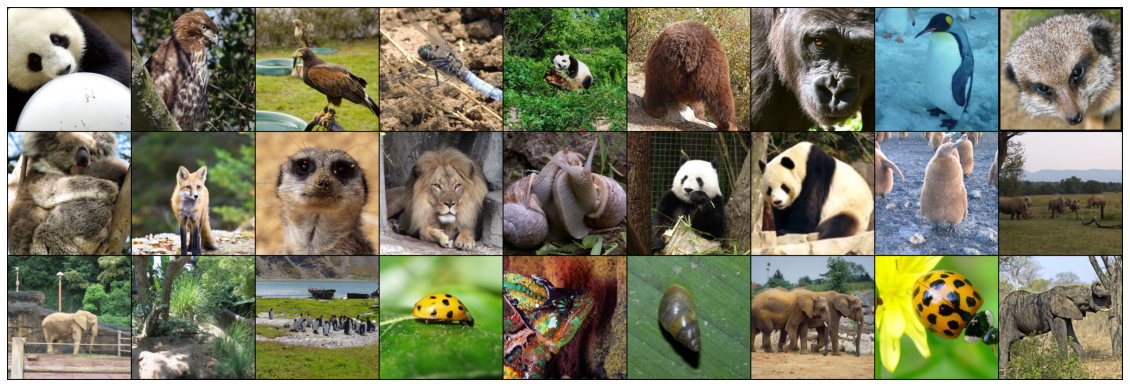

In [ ]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]
print(f"size of the image {fixed_input[0].shape}")

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [ ]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(16), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 3, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 4, stride = 2)
        self.layer5 = self.make_layer(ResidualBlock, 256, 6, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 512, 3, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
            # define the linear layers
        self.fc = nn.Linear(512, num_classes)
        # self.fc2 = nn.Linear(1024, num_classes)
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        
        x = self.layer1(x)
        
        x = self.layer2(x)
        
        x = self.layer3(x)
        
        x = self.layer4(x)
        
        x = self.layer5(x)
        
        x = self.layer6(x)
       
        # x = self.maxpool(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        # x = F.dropout(x, p=0.5)
        # x = F.relu(self.fc(x))
        # # x = F.dropout(x, p=0.2)
        # x = self.fc2(x)
        x = self.fc(x)

        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [ ]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_losses = np.zeros(epochs) # *****
    test_losses = np.zeros(epochs)  # *****
    for e in range(epochs):
        train_loss = [] # ******
        for t, (x, y) in enumerate(loader_train):
            # if t % print_every == 0:
            #     print(f" input shape {x.shape}")
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            train_loss.append(loss.item())

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f ' % (e, t, loss.item()))

        check_accuracy(loader_val, model)

        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading
        
        model.eval()
        test_loss = []
        for inputs, targets in loader_val:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          loss = F.cross_entropy(outputs, targets)
          test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        
        # Save losses
        train_losses[e] = train_loss
        test_losses[e] = test_loss
        
    return train_losses, test_losses # ******    

cuda:0


Total number of parameters is: 21312324
Epoch: 0, Iteration 0, loss = 3.1213 
Epoch: 0, Iteration 10, loss = 2.9112 
Epoch: 0, Iteration 20, loss = 2.8419 
Epoch: 0, Iteration 30, loss = 2.8130 
Epoch: 0, Iteration 40, loss = 2.7395 
Epoch: 0, Iteration 50, loss = 2.4864 
Epoch: 0, Iteration 60, loss = 2.5385 
Epoch: 0, Iteration 70, loss = 2.5571 
Epoch: 0, Iteration 80, loss = 2.7390 
Epoch: 0, Iteration 90, loss = 2.3658 
Epoch: 0, Iteration 100, loss = 2.2371 
Epoch: 0, Iteration 110, loss = 2.3049 
Epoch: 0, Iteration 120, loss = 2.3850 
Epoch: 0, Iteration 130, loss = 2.3956 
Epoch: 0, Iteration 140, loss = 2.2740 
Got 428 / 1998 correct of val set (21.42)
Epoch: 1, Iteration 0, loss = 2.2477 
Epoch: 1, Iteration 10, loss = 2.2874 
Epoch: 1, Iteration 20, loss = 2.2254 
Epoch: 1, Iteration 30, loss = 2.1979 
Epoch: 1, Iteration 40, loss = 2.1265 
Epoch: 1, Iteration 50, loss = 2.3577 
Epoch: 1, Iteration 60, loss = 2.0475 
Epoch: 1, Iteration 70, loss = 2.0547 
Epoch: 1, Iteratio

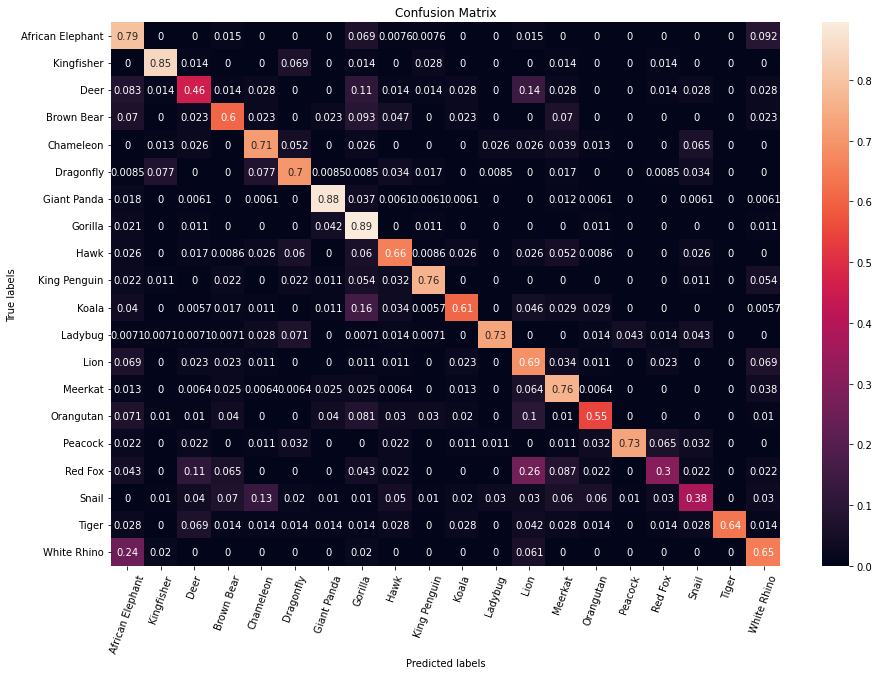

Predicted label ['Red Fox' 'Chameleon' 'Orangutan' 'Gorilla' 'Meerkat' 'Snail'
 'Giant Panda' 'African Elephant' 'Koala']
True label ['Peacock' 'Snail' 'Snail' 'Kingfisher' 'Deer' 'Deer' 'Koala'
 'White Rhino' 'Brown Bear']
Corresponding images are shown below


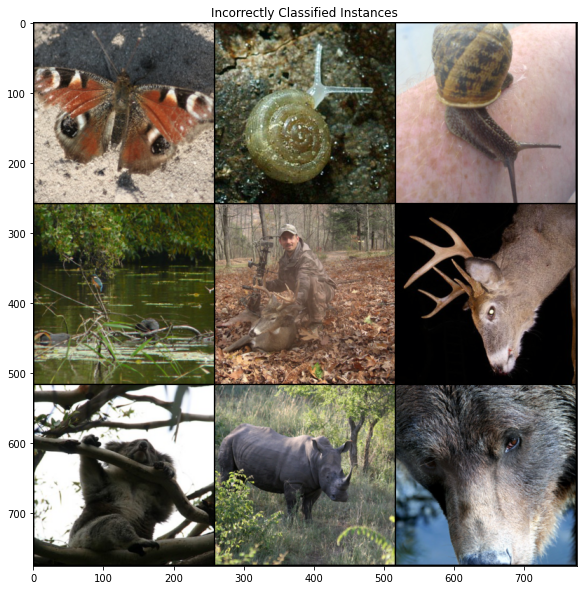

In [ ]:
# define and train the network
model = MyResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001) 

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, epochs = 10)


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')


Got 15546 / 17986 correct of val set (86.43)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


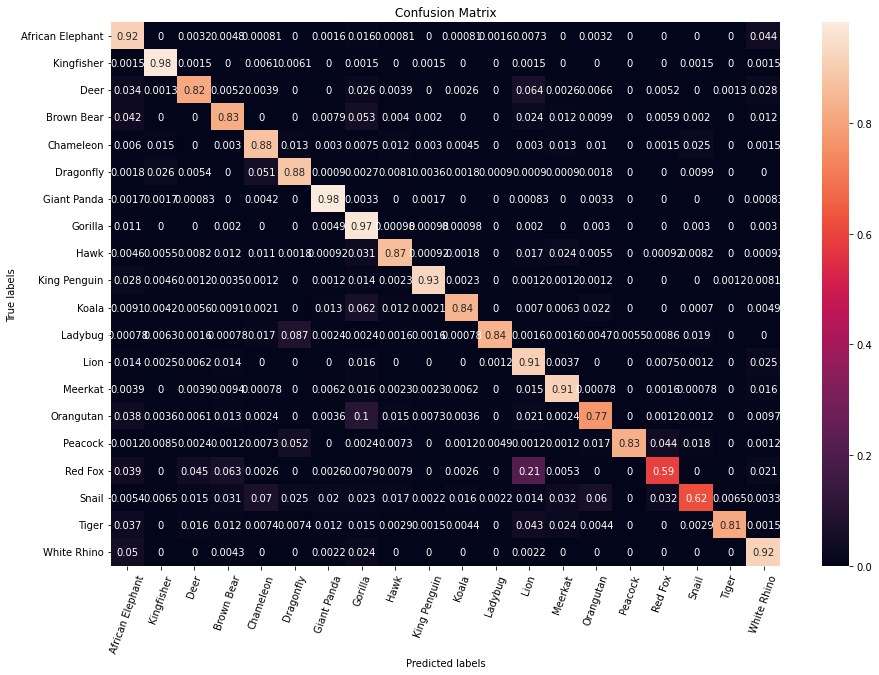

Predicted label ['Gorilla' 'Orangutan' 'African Elephant' 'Lion' 'Gorilla' 'Deer'
 'White Rhino' 'African Elephant']
True label ['Koala' 'Snail' 'Deer' 'Chameleon' 'Orangutan' 'Snail' 'Red Fox'
 'White Rhino']
Corresponding images are shown below


0.864338930279106

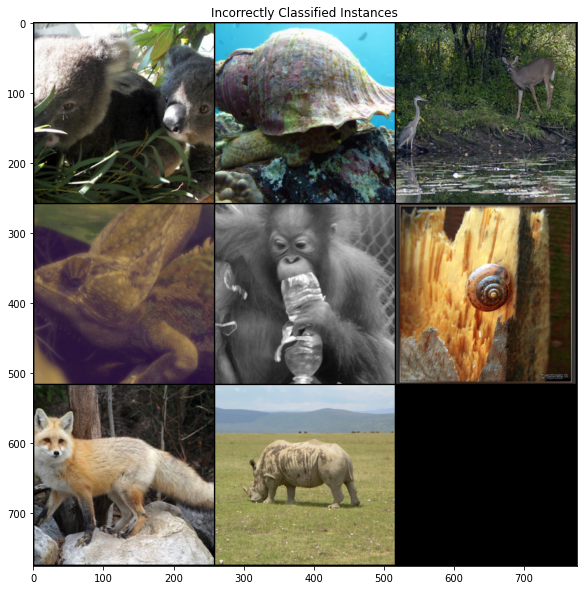

In [ ]:
check_accuracy(loader_train, model, analysis=True)

In [ ]:
from torchsummary import summary
summary(model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             432
       BatchNorm2d-2         [-1, 16, 256, 256]              32
              ReLU-3         [-1, 16, 256, 256]               0
            Conv2d-4         [-1, 16, 128, 128]           2,304
       BatchNorm2d-5         [-1, 16, 128, 128]              32
              ReLU-6         [-1, 16, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]           2,304
       BatchNorm2d-8         [-1, 16, 128, 128]              32
            Conv2d-9         [-1, 16, 128, 128]             256
      BatchNorm2d-10         [-1, 16, 128, 128]              32
    ResidualBlock-11         [-1, 16, 128, 128]               0
           Conv2d-12         [-1, 16, 128, 128]           2,304
      BatchNorm2d-13         [-1, 16, 128, 128]              32
             ReLU-14         [-1, 16, 1

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential(
        (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(16, 16, ke

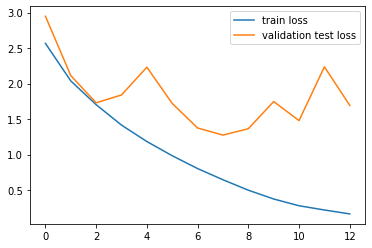

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='validation test loss')
plt.legend()
plt.show()

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1351 / 2000 correct of val set (67.55)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


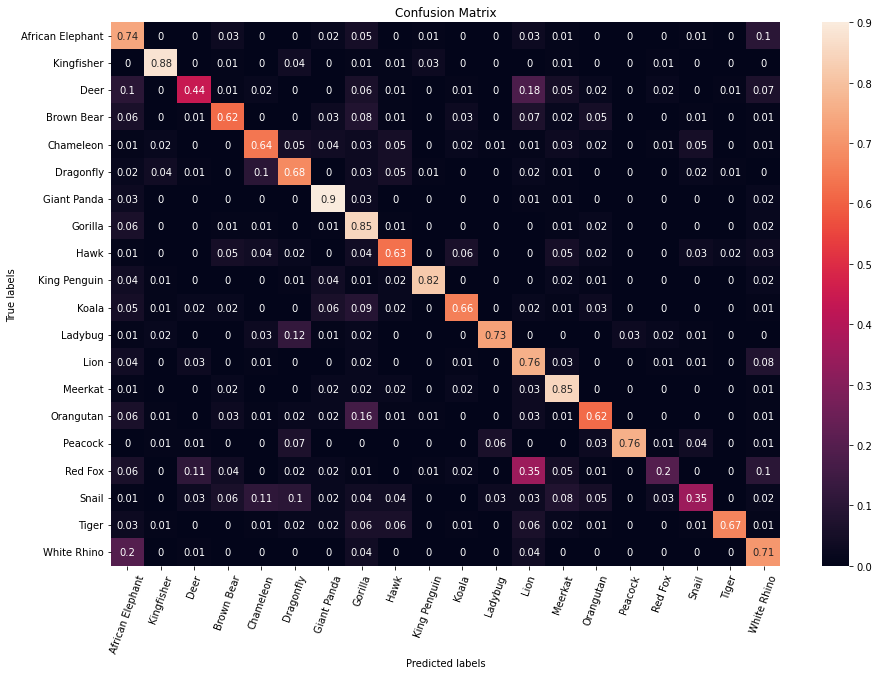

Predicted label ['Ladybug' 'Red Fox' 'Gorilla' 'Lion' 'Lion' 'Brown Bear' 'Red Fox'
 'African Elephant' 'Hawk']
True label ['Snail' 'Lion' 'Red Fox' 'Deer' 'Snail' 'Snail' 'Snail' 'White Rhino'
 'Snail']
Corresponding images are shown below


0.6755

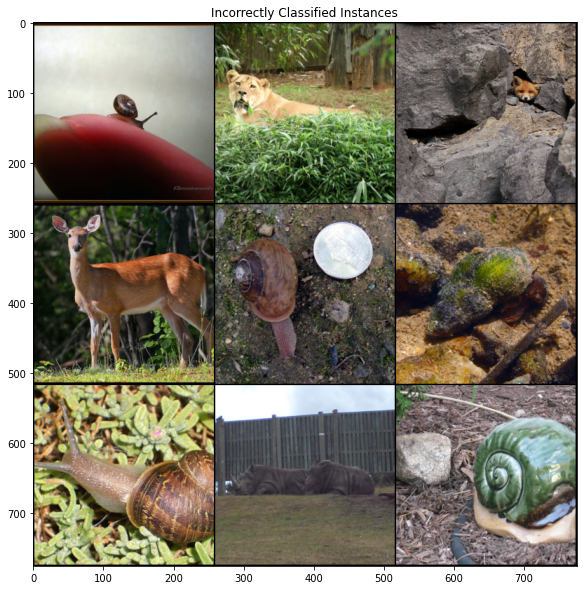

In [ ]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

ANSWER HERE
Apply regularization to the inner structure of the layers

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [ ]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



In [ ]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

BatchNorm Layer results: All test cases passed!

Convolution Layer results: All test cases passed!

Linear Layer results: All test cases passed!

MaxPool Layer results: All test cases passed!

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)